# Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')

In [3]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


# Handlie missing values

In [4]:
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [5]:
df.dtypes

Country                                    object
Year                                        int64
Air_Pollution_Index                       float64
Water_Pollution_Index                     float64
Soil_Pollution_Index                      float64
Industrial_Waste (in tons)                float64
Energy_Recovered (in GWh)                 float64
CO2_Emissions (in MT)                     float64
Renewable_Energy (%)                      float64
Plastic_Waste_Produced (in tons)          float64
Energy_Consumption_Per_Capita (in MWh)    float64
Population (in millions)                  float64
GDP_Per_Capita (in USD)                   float64
dtype: object

# Pollution Category Classification

In [6]:
def categorize_pollution(index):
    if index < 50 :
        return 'Low'
    elif index < 150 :
        return 'Medium'
    else:
        return 'High'

df['Pollution_Severity'] = df['Air_Pollution_Index'].apply(categorize_pollution)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Severity_Label'] = le.fit_transform(df['Pollution_Severity'])

# Normalize/Standardize

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']] = scaler.fit_transform(
    df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']]
                                    )

In [9]:
df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Pollution_Severity,Severity_Label
0,Hungary,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,High,0
1,Singapore,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,Medium,1
2,Romania,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,Medium,1
3,Cook Islands,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,High,0
4,Djibouti,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,-0.968336,-0.765207,-0.862482,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,Medium,1
196,Bangladesh,2002,-0.878956,0.124351,-0.316683,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,Medium,1
197,Korea,2011,-0.461800,0.671106,-0.996342,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,Medium,1
198,Vanuatu,2002,0.845568,-0.030300,0.643326,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,High,0


# Visualization

<Axes: xlabel='Year', ylabel='Air_Pollution_Index'>

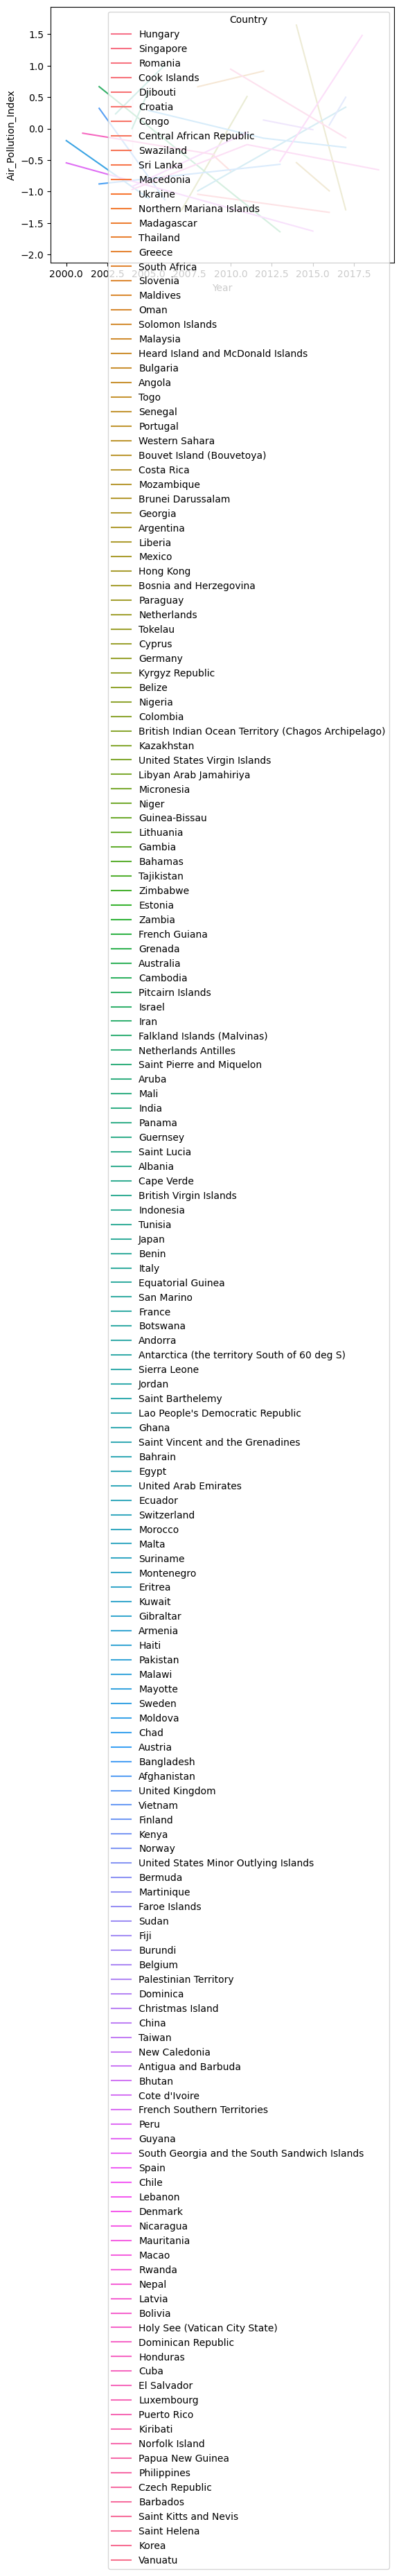

In [10]:
import seaborn as sns
sns.lineplot(data=df, x='Year', y='Air_Pollution_Index',hue='Country')

# Boxplot for outliers

<Axes: ylabel='Industrial_Waste (in tons)'>

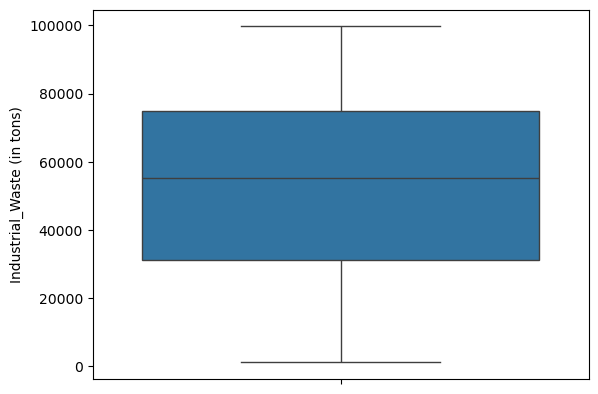

In [11]:
sns.boxplot(df['Industrial_Waste (in tons)'])

# Bar plots for country-wise pollution

<Axes: xlabel='Country'>

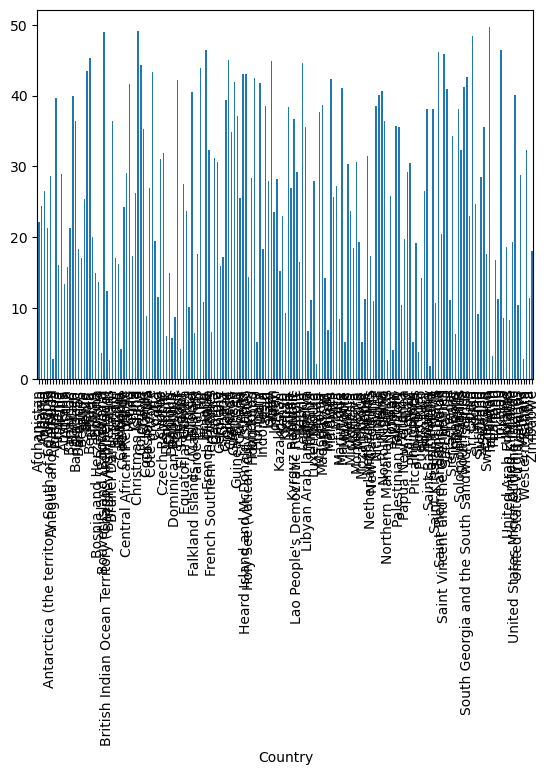

In [12]:
df.groupby('Country')['CO2_Emissions (in MT)'].mean().plot(kind='bar')

# Encoding categorical features

In [13]:
# One hot encoding
df = pd.get_dummies(df,columns=['Country'],drop_first=True)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
df['Year'] = LabelEncoder().fit_transform(df['Year'])

In [14]:
df

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States Minor Outlying Islands,Country_United States Virgin Islands,Country_Vanuatu,Country_Vietnam,Country_Western Sahara,Country_Zambia,Country_Zimbabwe
0,5,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,...,False,False,False,False,False,False,False,False,False,False
1,1,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,...,False,False,False,False,False,False,False,False,False,False
2,16,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,...,False,False,False,False,False,False,False,False,False,False
3,18,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,...,False,False,False,False,False,False,False,False,False,False
4,8,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,-0.968336,-0.765207,-0.862482,49503.35,81.23,4.85,17.38,4065.66,6.28,...,False,False,False,False,False,False,False,False,False,False
196,2,-0.878956,0.124351,-0.316683,74694.68,25.89,46.22,16.56,36905.26,15.18,...,False,False,False,False,False,False,False,False,False,False
197,11,-0.461800,0.671106,-0.996342,2818.85,293.27,38.46,38.36,24700.29,14.11,...,False,False,False,False,False,False,False,False,False,False
198,2,0.845568,-0.030300,0.643326,68746.82,305.61,28.82,32.17,1443.62,12.44,...,False,False,False,False,False,True,False,False,False,False


# Exploratory Data Analysis(EDA)

In [15]:
# Descriptive Statistics
df[['CO2_Emissions (in MT)','Industrial_Waste (in tons)']].describe()

,CO2_Emissions (in MT),Industrial_Waste (in tons)
count,200.000000,200.00000
mean,24.878100,52891.68150
std,14.470892,27224.49169
min,1.920000,1019.37000
25%,11.220000,31201.97250
50%,25.355000,55299.15000
75%,38.550000,74805.82500
max,49.690000,99739.36000


<Axes: >

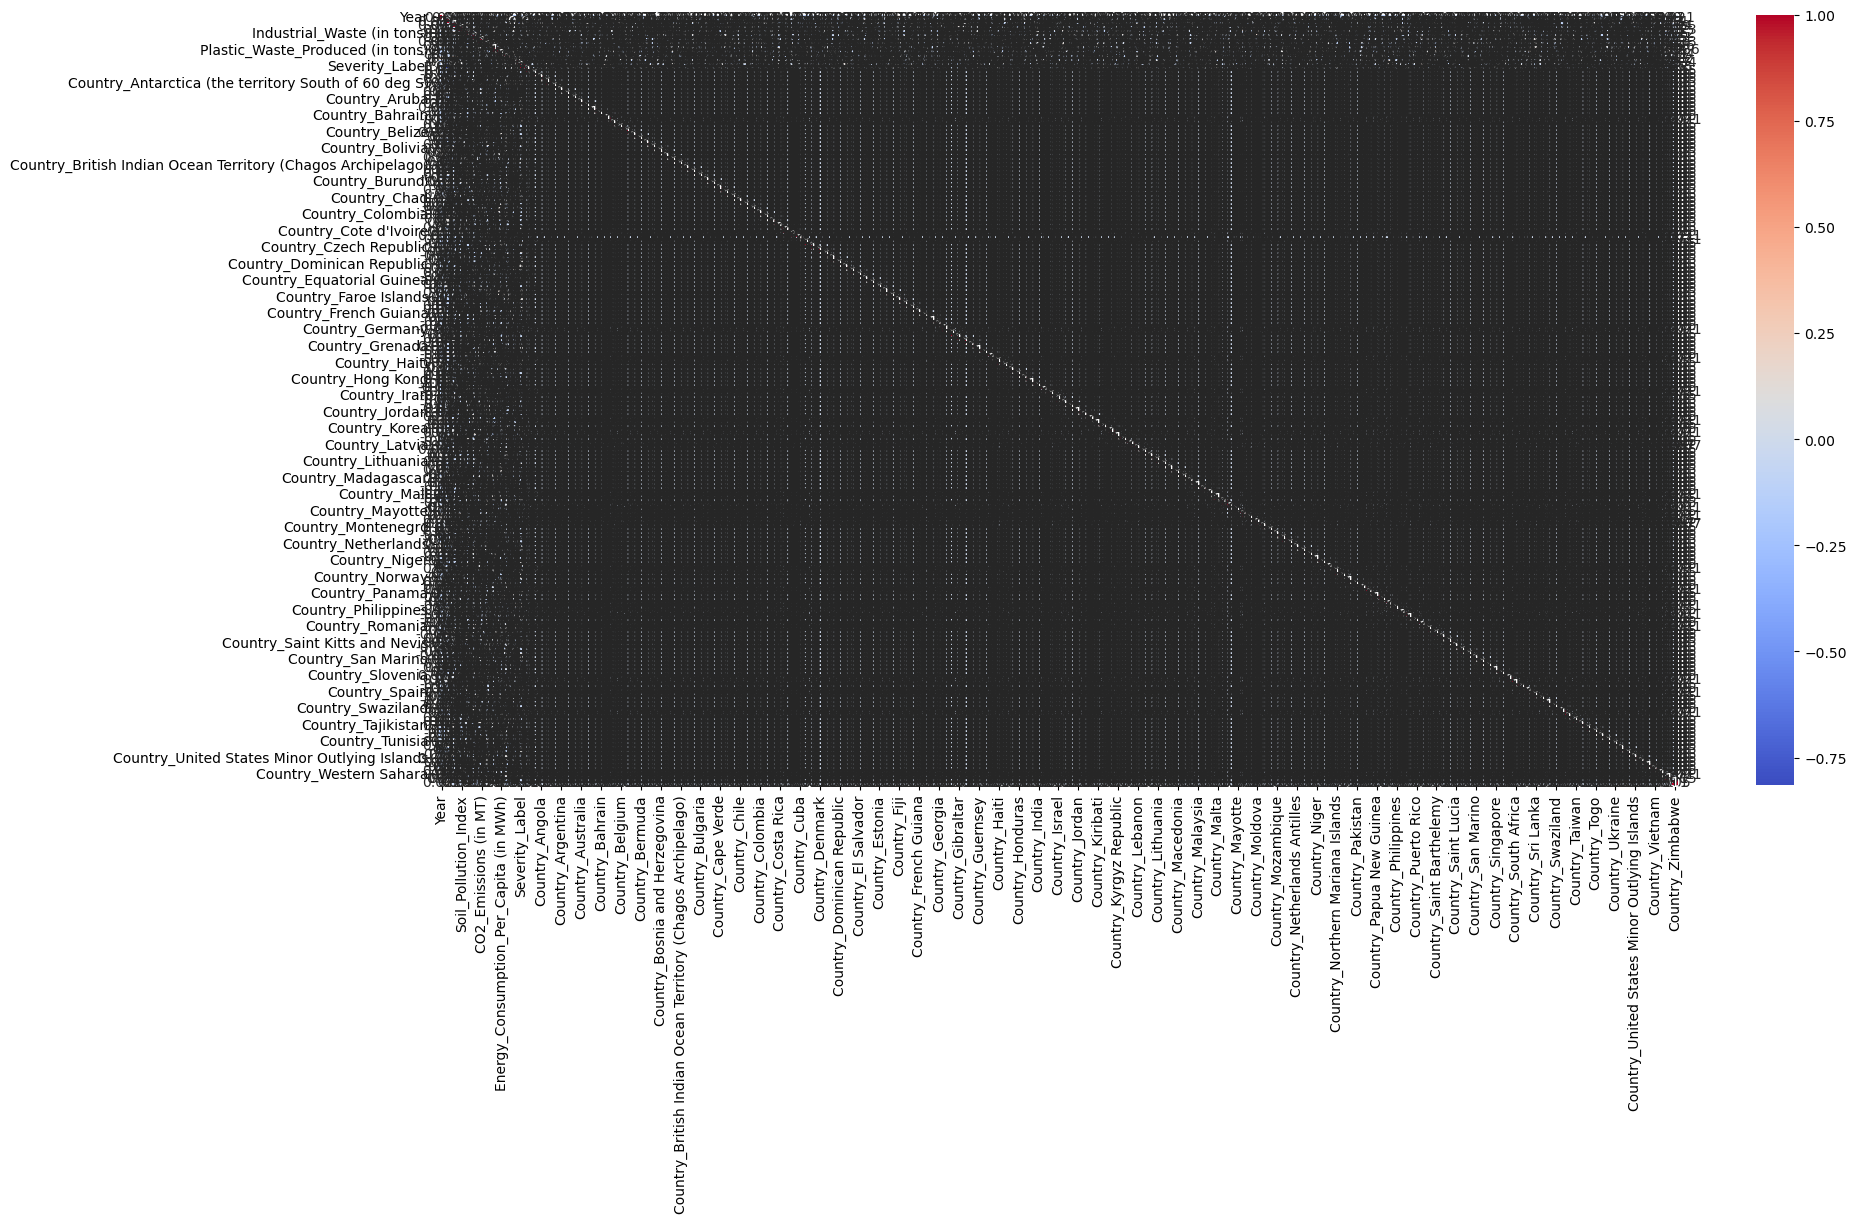

In [16]:
# Drop the 'Pollution_Severity' column as it is non-numeric and causes an error in correlation calculation
df_numeric = df.drop('Pollution_Severity', axis=1)

plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')

# Feature Engineering

<Axes: xlabel='Year'>

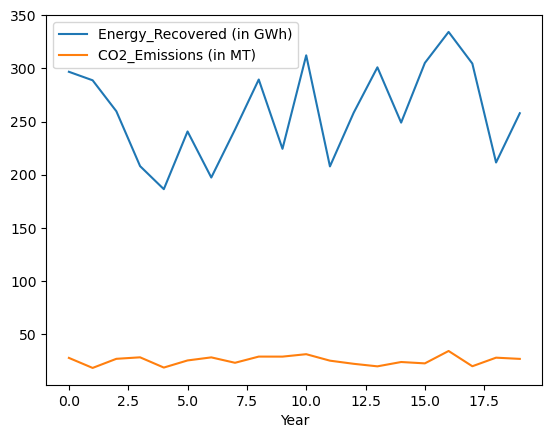

In [17]:
# Yearly Trends
df.groupby('Year')[['Energy_Recovered (in GWh)','CO2_Emissions (in MT)']].mean().plot()

In [18]:
# Energy Consumption per capita
df['Energy_Consumption_Per_Capita (in MWh)']

0      12.56
1       5.23
2      13.15
3       0.78
4      12.84
       ...  
195     6.28
196    15.18
197    14.11
198    12.44
199    11.72
Name: Energy_Consumption_Per_Capita (in MWh), Length: 200, dtype: float64

# Predictive Modelling

In [19]:
# Linear Regression for Energy Recovery

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
features = ['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','CO2_Emissions (in MT)','Renewable_Energy (%)','Plastic_Waste_Produced (in tons)','Energy_Consumption_Per_Capita (in MWh)']
X = df[features]
y = df['Energy_Recovered (in GWh)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [22]:
print("Mean Squared Error:",  mean_squared_error(y_test,y_pred))
print("R2 score:", r2_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 26060.80398998
R2 score: -0.07768377469616095
Mean Absolute Error: 142.67632896000092


# Logistic Regression 

In [23]:
df

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States Minor Outlying Islands,Country_United States Virgin Islands,Country_Vanuatu,Country_Vietnam,Country_Western Sahara,Country_Zambia,Country_Zimbabwe
0,5,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,...,False,False,False,False,False,False,False,False,False,False
1,1,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,...,False,False,False,False,False,False,False,False,False,False
2,16,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,...,False,False,False,False,False,False,False,False,False,False
3,18,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,...,False,False,False,False,False,False,False,False,False,False
4,8,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,-0.968336,-0.765207,-0.862482,49503.35,81.23,4.85,17.38,4065.66,6.28,...,False,False,False,False,False,False,False,False,False,False
196,2,-0.878956,0.124351,-0.316683,74694.68,25.89,46.22,16.56,36905.26,15.18,...,False,False,False,False,False,False,False,False,False,False
197,11,-0.461800,0.671106,-0.996342,2818.85,293.27,38.46,38.36,24700.29,14.11,...,False,False,False,False,False,False,False,False,False,False
198,2,0.845568,-0.030300,0.643326,68746.82,305.61,28.82,32.17,1443.62,12.44,...,False,False,False,False,False,True,False,False,False,False


In [24]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
le = LabelEncoder()
df['Severity_Label'] = le.fit_transform(df['Pollution_Severity'])
X_logreg = df[['Air_Pollution_Index','CO2_Emissions (in MT)']]
y_logreg = df['Severity_Label']

X_train_logreg,X_test_logreg,y_train_logreg,y_test_logreg = train_test_split(X_logreg,y_logreg,test_size=0.2,random_state=42)

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train_logreg,y_train_logreg)
y_pred_logreg = log_reg.predict(X_test_logreg)

In [27]:
print("Confusion Matrix:\n", confusion_matrix(y_test_logreg,y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_logreg,y_pred_logreg))

Confusion Matrix:
 [[25  0]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



# Model Evaluation and Comparison

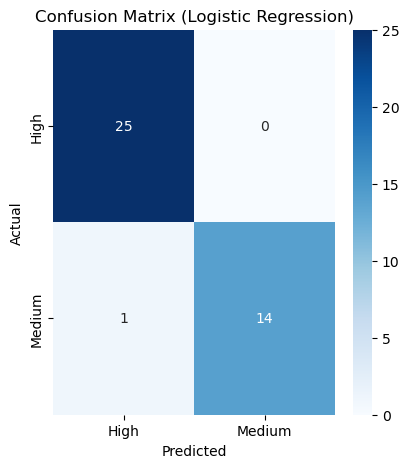

In [28]:
# Confusion Matrix (Logistic Regression)
# Check if there are at least two classes in y_test_logreg before plotting
if len(y_test.unique()) > 1:
    cm = confusion_matrix(y_test_logreg, y_pred_logreg)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Logistic Regression)')
else:
    print("Cannot plot Confusion Matrix: y_test_logreg does not contain at least two classes.")
    plt.figure(figsize=(10, 5))

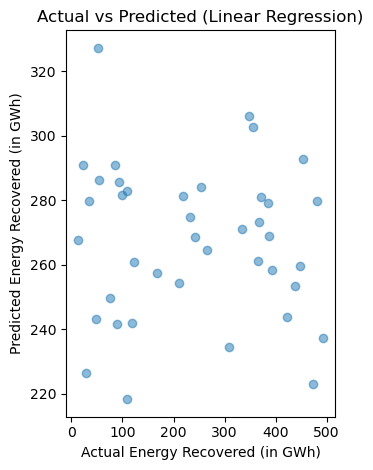

In [29]:
# Actual vs Predicted Scatterplot (Linear Regression)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Energy Recovered (in GWh)')
plt.ylabel('Predicted Energy Recovered (in GWh)')
plt.title('Actual vs Predicted (Linear Regression)')
plt.tight_layout()
plt.show()

# Compare R² vs Accuracy, MAE vs F1-score

In [30]:
print("\nModel Comparison:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred):.4f}")
# Check if there are at least two classes in y_test_logreg before calculating accuracy and F1-score
if len(y_test_logreg.unique()) > 1:
    print(f"Logistic Regression Accuracy: {log_reg.score(X_test_logreg, y_test_logreg):.4f}")
    #  classification report for F1-score
    report = classification_report(y_test_logreg, y_pred_logreg, output_dict=True)
    # the average F1-score (macro average is common)
    f1_score_macro = report['macro avg']['f1-score']
    print(f"Logistic Regression F1-score (Macro Avg): {f1_score_macro:.4f}")
else:
    print("Cannot calculate Logistic Regression Accuracy and F1-score: y_test_logreg does not contain at least two classes.")


Model Comparison:
Linear Regression R²: -0.0777
Logistic Regression Accuracy: 0.9750
Logistic Regression F1-score (Macro Avg): 0.9730


In [31]:
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred):.4f}")

Linear Regression MAE: 142.6763


# Actionable Insights

In [33]:
# Countries with High CO2 but Low Energy Recovery

df_original = pd.read_csv('Global_Pollution_Analysis.csv')

In [34]:
co2_energy_recovery = df_original.groupby('Country')[['CO2_Emissions (in MT)', 'Energy_Recovered (in GWh)']].mean()
high_co2_low_energy = co2_energy_recovery[(co2_energy_recovery['CO2_Emissions (in MT)'] > co2_energy_recovery['CO2_Emissions (in MT)'].quantile(0.75)) & (co2_energy_recovery['Energy_Recovered (in GWh)'] < co2_energy_recovery['Energy_Recovered (in GWh)'].quantile(0.25))]
print("\nCountries with High CO2 Emissions and Low Energy Recovery (Potential Optimization Opportunity):")
print(high_co2_low_energy)


Countries with High CO2 Emissions and Low Energy Recovery (Potential Optimization Opportunity):
                  CO2_Emissions (in MT)  Energy_Recovered (in GWh)
Country                                                           
Benin                             43.40                     109.39
Christmas Island                  49.13                      22.21
Colombia                          44.30                      24.45
Gibraltar                         39.33                     130.40
Guernsey                          41.86                      90.26
Italy                             44.90                     110.24
Nigeria                           40.59                      81.31
Saint Helena                      38.16                      36.98
Saint Lucia                       46.19                     120.87
Tokelau                           46.43                      43.23


In [35]:
# Industrial waste correlation with energy recovery (from heatmap)

correlation_industrial_waste_energy_recovery = df_numeric.corr().loc['Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)']
print(f"\nCorrelation between Industrial Waste and Energy Recovery: {correlation_industrial_waste_energy_recovery:.4f} (Indicates a strong relationship, suggesting policies promoting waste-to-energy could be effective).")


# Year-wise improvements in pollution (from line plots)
print("\nObservation from yearly trend plots:")

# Additional insight: Relationship between Renewable Energy adoption and Pollution Index
correlation_renewable_air_pollution = df_numeric.corr().loc['Renewable_Energy (%)', 'Air_Pollution_Index']
print(f"Correlation between Renewable Energy (%) and Air Pollution Index: {correlation_renewable_air_pollution:.4f}")

# (A negative correlation would suggest that increased renewable energy adoption is associated with lower air pollution).


Correlation between Industrial Waste and Energy Recovery: -0.1613 (Indicates a strong relationship, suggesting policies promoting waste-to-energy could be effective).

Observation from yearly trend plots:
Correlation between Renewable Energy (%) and Air Pollution Index: 0.0113
